# **Analiza zbioru Taxi-dane**
Krzysztof Budnik

## **Importowanie modułów**
Do przeprowadzenia anlizy niezbędne są pakiety, umożliwające analizę i wizualizację danych. </br>

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Exploratory Data Analysis**
Przed rozpoczęciem właściwej analizy konieczne jest przeprowadzenie EDA (Exploratory Data Analysis). <br>
Podczas tego etapu zamierzam skupić sie następujących czynnościach:
- przeanalizowanie struktury danych i zbadanie kolumn wchodzących w skład datasetu
- zbadanie typów zmiennych (wprowadzenie ewentualnych dostosowań w celu umożliwienia przyszłych obliczeń)
- sprawdzenie ilości brakujących wartości dla poszczególnych kolumn
- sprawdzenie unikalnych wartości dla wybranych kolumn
- usunięcie *ukrytych* brakujących wartości 


#### **Import danych i badanie kolumn**

In [3]:
taxi_data = pd.read_csv("taxi_dane.csv")
print("Ilość wszystkich wprzejazdów w zbiorze danych:", len(taxi_data))
taxi_data.head()

Ilość wszystkich wprzejazdów w zbiorze danych: 100000


c:\Users\budcr\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,...,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location,year,month
0,b57de4fbd42a4fcdfac294083ad896f9b3b19e30,1a0918b9bfea038d074d533672fa8d2a32a9b2628fbb34...,2013-10-01 00:00:00 UTC,2013-10-01 00:30:00 UTC,1800.0,1.49,NaN,NaN,32,out of town,...,Cash,no company name,"41,878865584","-87,625192142","POINT (-87,6251921424 41,8788655841)",NaN,NaN,NaN,2013,10
1,7e0b8a1d91467a8b6c38503812ccf9ceaf81ae46,2fea69c8a6e08471bc4339a05e9ee7955bef68d791f77a...,2013-10-01 00:00:00 UTC,2013-10-01 00:15:00 UTC,900.0,8.00,NaN,NaN,28,3,...,Cash,no company name,"41,874005383","-87,66351755","POINT (-87,6635175498 41,874005383)","41,96581197","-87,655878786","POINT (-87,6558787862 41,96581197)",2013,10
2,6f461021d891c897195a602bb6d0bc282f7cff30,061cabe01cfa6d1719184ef6316e77a21469d100eb70f1...,2013-10-01 00:15:00 UTC,2013-10-01 00:30:00 UTC,900.0,9.60,NaN,NaN,32,41,...,Cash,no company name,"41,878865584","-87,625192142","POINT (-87,6251921424 41,8788655841)","41,794090253","-87,592310855","POINT (-87,592310855 41,794090253)",2013,10
3,ad92e39b524db2e5ca7e54df5db96d806261ed66,fc662712fcee7cc17c53c79bb57f09d0a612440700aa67...,2013-10-01 00:15:00 UTC,2013-10-01 00:30:00 UTC,1620.0,0.49,1.703108e+10,1.703133e+10,8,33,...,Cash,no company name,"41,892507781","-87,626214906","POINT (-87,6262149064 41,8925077809)","41,859349715","-87,617358006","POINT (-87,6173580061 41,859349715)",2013,10
4,baf5ef44846907d5f0af6f0eb17ae25c784a80c0,873bacf70099d6c3eb461ab1946fcc8b47cfc95fe78c3b...,2013-10-01 00:30:00 UTC,2013-10-01 01:00:00 UTC,2220.0,32.50,NaN,NaN,8,out of town,...,Cash,no company name,"41,899602111","-87,633308037","POINT (-87,6333080367 41,899602111)",NaN,NaN,NaN,2013,10


#### **Położenie geograficzne**
Ciekawym elementem zbioru danych jest obecność informacji o szerokości i wysokości geograficznej. <br>
Po sprawdzeniu paru lokalizacji dochodzę do wniosku, iż analizowany zbiór danych przejazdów taksówkowych jest z <br>
Chicago w USA. Tym samym, interpertując wartości pieniężne będę używać dolarów amerykańskich - USD.

#### **Analiza typów zmiennych**

In [4]:
taxi_data.dtypes

unique_key                 object
taxi_id                    object
trip_start_timestamp       object
trip_end_timestamp         object
trip_seconds              float64
trip_miles                float64
pickup_census_tract       float64
dropoff_census_tract      float64
pickup_community_area      object
dropoff_community_area     object
fare                      float64
tips                      float64
tolls                     float64
extras                    float64
trip_total                float64
payment_type               object
company                    object
pickup_latitude            object
pickup_longitude           object
pickup_location            object
dropoff_latitude           object
dropoff_longitude          object
dropoff_location           object
year                        int64
month                       int64
dtype: object

In [5]:
# zamiana data na format datetime, celem umożliwienia dalszych analiz
taxi_data["trip_start_timestamp"] = pd.to_datetime(taxi_data["trip_start_timestamp"].str[:-4])
taxi_data["trip_end_timestamp"] = pd.to_datetime(taxi_data["trip_end_timestamp"].str[:-4])

**Wnioski**
- Kolumna `unique_key` reprezentuje id każdej trasy i może posłużyć do ich zliczania
- `taxi_id` reprezentuje pojedyncze taksówki
- Kolumny opisujące czas startu i końca (odpowiednio: `trip_start_timestamp` i `trip_end_timestamp`) podróży wymagały dostosowania <br>
(zmiana formatu na datetime)
- Pozostałe kolumny, takie jak na przykład `fare`, `tips`, `trip_miles` zostały zapisane w formacie float co jest bardzo dobrą informacją <br>
ponieważ nie będzie wymagane ich czyszczenie

#### **Brakujące wartości**

In [6]:
taxi_data.isna().sum()

unique_key                    0
taxi_id                       0
trip_start_timestamp          0
trip_end_timestamp            0
trip_seconds                  9
trip_miles                    0
pickup_census_tract       54132
dropoff_census_tract      74160
pickup_community_area         0
dropoff_community_area        0
fare                          1
tips                          1
tolls                     11461
extras                        1
trip_total                    1
payment_type                  0
company                       0
pickup_latitude           11514
pickup_longitude          11514
pickup_location           11514
dropoff_latitude          44885
dropoff_longitude         44885
dropoff_location          44885
year                          0
month                         0
dtype: int64

In [7]:
# usunięcie wadliwego rekordu
taxi_data = taxi_data[~taxi_data.fare.isna()]

**Wnioski**
- Znane jest: id taksówki, start i koniec podróży, dystans i sposób płatności dla każdego przejazdu
- Nie jest znana jedna opłata za przejazd, biorąc pod uwagę wielkość zbioru danych zdecydowałem się wyłączyć z analizy ten rekord <br>
Co więcej, rozwiązuje to problem jednej brakującej wartości dla napiwka i całkowitej opłaty
- Dobrą informacją jest fakt, iż znamy wszystkie lokalizacje "pickup" i "dropoff"

#### **Sprawdzenie unikalnych wartości**
Sprawdzenie unikalnych wartości i ich zliczenie pozwala szybko wykryć ewentualne problemy ze zmiennymi. <br>
Skupię się na zmiennych jakościowych, ponieważ zwykle wystepuje w nich najwięcej błedów / niezrozumiałych wartości.

In [8]:
q_columns = ["payment_type", "company"]

for col in q_columns:
    print(taxi_data[col].value_counts())
    print("\n")

Cash           74561
Credit Card    25377
Pcard             38
Prcard            23
Name: payment_type, dtype: int64


no company name              88479
303 Taxi                      6177
Metro Group                   5282
Sun Taxi                        31
Globe Taxi                      12
Chicago Carriage Cab Corp        6
City Service                     4
Medallion Leasin                 4
Flash Cab                        2
Blue Diamond                     1
Chicago Taxicab                  1
Name: company, dtype: int64




**Wnioski**
- W przypadku `payment_type`, wszystkie pojawiające się unikalane wartości wydają się mieć sens. <br> 
Chociaż wartości: "Pcard" i "Prcard" zdają się opisywać to samą formę: karty prepaid albo purchasing cards. Jendakże bez odpowiedniej dokumnetacji, <br>
jest to niemożliwe do zweryfikowania. Możliwe, że dla organizacji zbierającej te dane rzeczywiście są to różne sposoby płatności, <br>
dlatego nie zamierzam ich zmieniać
<br>
<br>
- Ze zmienna `company` jest problem. Podczas badania brakujacych wartości kolumna nie przykuła mojej uwagi (0 braków). <br>
Jednak po dokładnym zbadaniu widać, że dla większości przejazdów firma taksówki nie jest określona. Trzeba to będzie uwzględnić w <br>
w przyszłych ewentualnych analizach tej zmiennej

#### **Usunięcie *ukrytych* brakuących wartości**
Sprawdzenie brakujących wartości nie wykazało braków dla kluczowych zmiennych takich jak `fare`, `trip_miles` itd. <br>
Niestety nie została wykluczona możliwość, że istnieją rekordy z np. samymi zerowymi wartościami. <br>
W tym kroku zmaierzam spawdzić ich ilość i je usunąć. Nie ma sensu analizowąc pustych danych.
- szukam przejzadów z `trip_miles` lub  `trip_seconds` równymi 0
- osobno szukam ilość przejazdów bez wartości `fare`

In [9]:
# sprawdzenie i aktualizacja datasetu
no_dist_and_time = taxi_data[(taxi_data.trip_miles == 0) | (taxi_data.trip_seconds == 0)]
no_fare = taxi_data[taxi_data.fare == 0]

print("Rekordy danych bez dystansu i czasu:", len(no_dist_and_time))
print("Rekordy danych bez informacji o opłacie:", len(no_fare))

taxi_data = taxi_data[(taxi_data.trip_miles != 0) & (taxi_data.trip_seconds != 0)]
taxi_data = taxi_data[taxi_data.fare != 0]
print("Łączna ilość rekordów po czyszczeniu danych:", len(taxi_data))

Rekordy danych bez dystansu i czasu: 5533
Rekordy danych bez informacji o opłacie: 80
Łączna ilość rekordów po czyszczeniu danych: 94466


In [10]:
no_dist_and_time.fare.head(10)

12      3.25
22      3.25
39      3.25
81      3.25
125     3.25
268    60.00
270     3.25
272     3.25
274    14.05
309     3.25
Name: fare, dtype: float64

**Wnioski i sposrzeżenia**
- usuwam przejazdy bez danych o dystansie lub czasie lub opłacie. Pomimo, iż stanowią 5% wszystkich rekordów i analiza </br>
może zakłócić wynik (tak naprawdę właczenie ich do analizy oznaczałoby analizę równiez przejazdów, które sie nie odbyły </br>
co nie wydaje się sensowne)
</br>
</br>
- wartym uwagi spostrzeżeniem jest fakt, iż większość rekordów bez dystansu lub czasie posiada opłatę `fare` </br>
na poziomie 3.25 USD (mediana dla tych danych). Moża przypuszczać zatem, że jest to opłata za rezygnację z kursu. </br>
Powyżej znajduje się pierwsze 10 opłat dla tego typu rekordów. Reasumując, jest to kolejna przesłanka, że nie pownno się tych danych </br>
o przejazdach łączyć z pozostałymi. 

## **Analiza pojedyńczych zmiennych**
W tej sekcji chciałbym się skupic na analizie wybranych zmiennych. </br>
Zamierzam miedzy innymi:
- zbadać kluczowe statystyki opisowe i rozkłady (zmienne ilościowe: `fares`, `tips`, `trip_miles`)
- wykryć najczęstsze trasy (badanie: `pickup_community_area` i `dropoff_community_area`)
- poznać najczęstsze godziny zamówień (badanie: `trip_start_timestamp`)
- sprawdzenie liczby unikalnych taksówkek i ilości tras jakie wykonały 

In [11]:
# ustawienia dla wizualizacji
sns.set_theme(style="darkgrid")
sns.set_palette(palette="Blues_r")

#### **Analiza opłat za przejazd**
- Średnia cena za przejazd wyniosła 14,96 natomiast mediana 10,25 
- Dysproporcja pomiędzy mediana a średną wskazuje na asymetrię prawostronną, co widać na zamieszczonym histogramie. <br>
Jest to zrozumiałe gdyż stosunkowo rzadkie, dłuższe przejazdy będą zawyżać średnią. Wizualizacja dobrze uwidacznia, <br>
iż większośc opłat za przejazd koncentruje się w przedziale 0-20.
<br>
<br>

**Uwagi:** Dla zwiększenia czytelności wizualizacji, ograniczyłem dane do przejazdów, gdzie `trip_total` był <br>
mniejszy niż 90 (ukryte zostało jedynie 200 rekordów)

Średnia opłata za przejazd: 15.59
Mediana opłaty za przejazd: 10.65


Text(0.5, 1.0, 'Rozkład cen przejazdów')

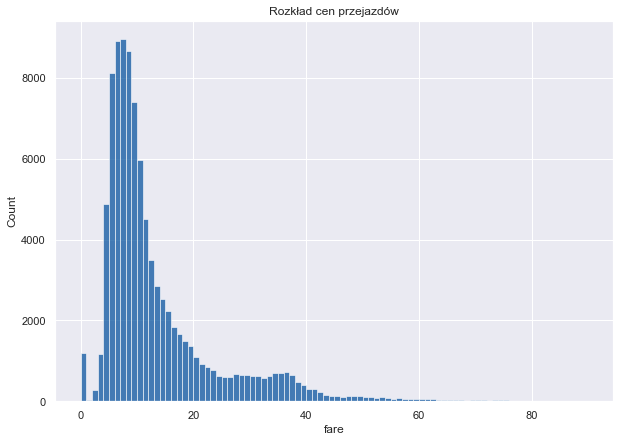

In [12]:
taxi_data = taxi_data[taxi_data.fare < 90]
print("Średnia opłata za przejazd:", round(np.mean(taxi_data.trip_total),2))
print("Mediana opłaty za przejazd:", np.median(taxi_data.trip_total))

plt.figure(figsize = (10, 7))
sns.histplot(taxi_data, x="fare", binwidth=1)
plt.title("Rozkład cen przejazdów")

#### **Napiwki i ich wpływ na przychody**
- Około co czwarty klient zdecydowany był zostawić napiwek za przejazd
- Średnia wartość napiwka wyniosła 1,33 
- Przychód uzyskany z napiwków (suma) stanowił jedynie 0,06 % przychodów ogółem

In [13]:
taxi_data["tips_percent"] = taxi_data["tips"] / taxi_data["fare"]

tips_percent = len(taxi_data[taxi_data.tips != 0])/len(taxi_data) * 100
average_tip = np.mean(taxi_data["tips_percent"])
tip_revenue_share = sum(taxi_data.tips)/sum(taxi_data.trip_total)

print("W jakim procencie przejazdów klient zdecydował się udzielić napiwek:", round(tips_percent, 2), "%")
print("Średnia wartość udzielonego napiwku:", round(average_tip, 2))
print("Przychód z napiwków jako część łącznych przychodów", round(tip_revenue_share, 2), "%")

W jakim procencie przejazdów klient zdecydował się udzielić napiwek: 24.16 %
Średnia wartość udzielonego napiwku: 1.04
Przychód z napiwków jako część łącznych przychodów 0.06 %


#### **Dystans podróży**
- Dane wskazują, iż w przejazdach dominują bardzo krótkie podróże (mediana = 2.1 mili) 
- Ponownie na załączonym histogramie możemy dostrzec asymetrię prawostronną co tylko podkreśla, że <br>
duża większość podróży skoncentrowana jest na dystansie nie przekraczającym 10 mil
<br>
<br>

**Uwagi:** Dla zwiększenia czytelności wizualizacji, ograniczyłem dane do przejazdów, gdzie `trip_miles` był <br>
mniejszy niż 50 (ukryte zostało około 800 rekordów, czyli mniej niż 1% wszystkich danych)

94240
Średnia dystans przejazdu: 4.33
Mediana dystansu przejazdu: 2.3


Text(0.5, 1.0, 'Rozkład dystansu przejazdów')

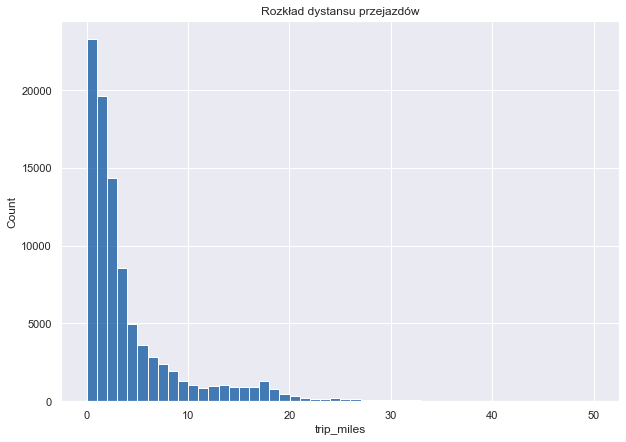

In [14]:
taxi_data = taxi_data[taxi_data.trip_miles < 50]
print(len(taxi_data))
print("Średnia dystans przejazdu:", round(np.mean(taxi_data.trip_miles),2))
print("Mediana dystansu przejazdu:", np.median(taxi_data.trip_miles))

plt.figure(figsize = (10, 7))
sns.histplot(taxi_data, x="trip_miles", binwidth=1)
plt.title("Rozkład dystansu przejazdów")

#### **Najczęściej wybierane trasy**
- Do wyznaczenia najczęstszych tras i dochodów jakie generują stworzyłem osobną kolumnę - `pickup_dropoff`, <br>
będącą połaczeniem `dropoff_community_area` i `pickup_community_area`.
- Dzięki temu rozwiązaniu, jestem w stanie pogrupować i zliczyć przejazdy dla każdej trasy. Pierwsza tabela poniżej <br>
przedstawia zestawienie tras i liczby przejazdów
- Załączyłem dodatkowo wykres słupkowy ilustrujący top 5 najcześciej wykorzystywanych tras
- Okazuje się, że dominują przejazdy z dzielnic poza miastem do również dzielnic pozamiejskich, na drugin miejscu znalazły się <br>
prejazdy z dystryku/obszaru 8 do obszarów poza miejskich

In [15]:
# dodanie kolumny pickup_dropoff
taxi_data["pickup_community_area"] = taxi_data["pickup_community_area"].apply(lambda x: str(x))
taxi_data["dropoff_community_area"] = taxi_data["dropoff_community_area"].apply(lambda x: str(x))
taxi_data["pickup_dropoff"] = taxi_data["pickup_community_area"] + " - " + taxi_data["dropoff_community_area"]

In [16]:
# naczęstsze trasy
top_routes = taxi_data["pickup_dropoff"].value_counts()
top_routes.reset_index().head(10)

,index,pickup_dropoff
0,out of town - out of town,8569
1,8 - out of town,8409
2,76 - out of town,6450
3,8 - 8,4843
4,32 - out of town,4629
5,8 - 33,4242
6,32 - 33,3888
7,6 - 8,2999
8,7 - 8,2617
9,8 - 28,2448


Text(0.5, 1.0, 'Najczęstsze trasy przejazdów')

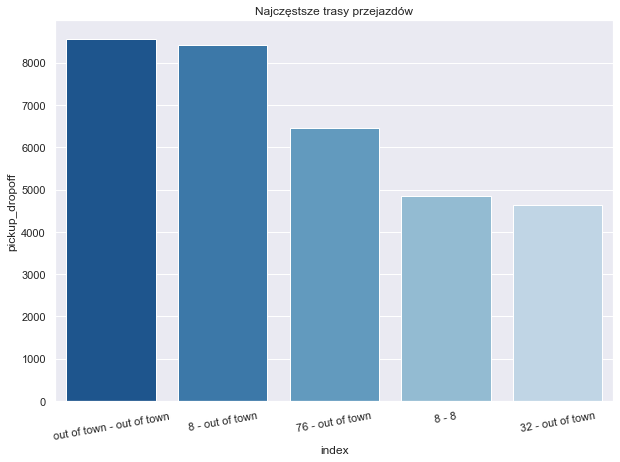

In [17]:
plt.figure(figsize = (10, 7))
sns.barplot(data=top_routes.reset_index()[:5], x="index", y="pickup_dropoff")
plt.xticks(rotation=10)
plt.title("Najczęstsze trasy przejazdów")

#### **Godziny szczytu**
- W celu sprawdzenia ilości przejazdów według danej godziny utworzyłem dedykowaną kolumnę `trip_hour` <br>
by umożliwić grupowanie
<br>
<br>
- w tabeli poniżej znajdują się dokładne ilości przejazdów, zależnie od godziny
- można zaryzykowac stwierdzenie, że rozkład jest bi modaly - w godzinach porannych widać znaczący wzrost przejazdów <br>
wywołany najpewniej dojazdami do pracy, poźniej natężenie się lekko zmniejsza by ponmowmie zacząć rosnąć i osiągnąć szczyt w godzinach 17-20. <br>
Zdecydowanie wyższa ilość przejazdów w godzinnach wieczornych spowodowana jest najpewniej powrotami z pracy. 
<br>
<br>
- Poniżej znajduję się wizualizacja rozkładu przejazdów, gdzie widać opisaną wyżej zależność. 

In [18]:
taxi_data["trip_hour"] = taxi_data["trip_start_timestamp"].apply(lambda x: x.hour)
rides_during_hour = taxi_data.groupby("trip_hour")["unique_key"].agg(len)
rides_during_hour = rides_during_hour.reset_index()
rides_during_hour.columns = rides_during_hour.columns.str.replace('unique_key', 'num_rides')
rides_during_hour

,trip_hour,num_rides
0,0,2786
1,1,2371
2,2,1848
3,3,1137
4,4,870
5,5,1214
6,6,2419
7,7,3733
8,8,4561
9,9,4876


Text(0.5, 1.0, 'Liczba przejazdów wg danej godziny')

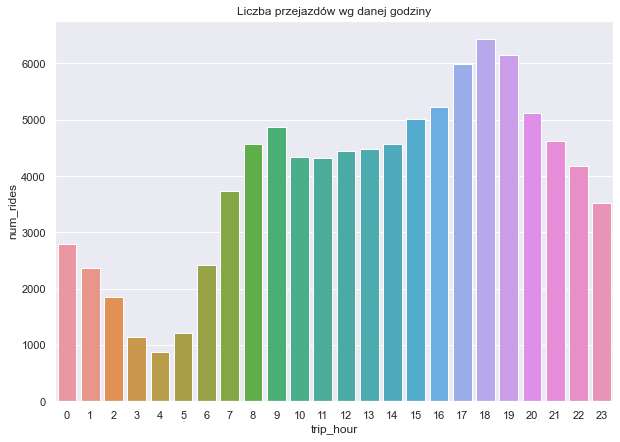

In [19]:
plt.figure(figsize = (10, 7))
sns.barplot(data=rides_during_hour, x="trip_hour", y="num_rides")
plt.title("Liczba przejazdów wg danej godziny")

#### **Analiza taksówek**
- Zbiór danych opisuje przejazdy, które wykonywało 1646 taksówek
- Poniższa tabla prezentuje ilośc przejazdów zależnie od taksówki (wg `taxi_id`). Dane zostałe posortowane malejąco. <br>
Możemy zauważyć, że taksówka, która wykonała najwięcej kursów ma ich 2138. 


In [20]:
unique_taxi = taxi_data.taxi_id.nunique()
print("Liczba unikalnych taksówek:" , unique_taxi)
rides_per_taxi = taxi_data.groupby("taxi_id")["unique_key"].agg(len)
rides_per_taxi = rides_per_taxi.reset_index().sort_values(by="unique_key", ascending=False)
rides_per_taxi.head(5)

Liczba unikalnych taksówek: 1646


,taxi_id,unique_key
693,6adb02556453c79096b14273579cbc9db7df43dd51e443...,2138
166,1897ed17bef32c8721aaeffd8239d3e1a49222c0eb602b...,1808
293,2e4af8d275dbd5afc012606bc94354705d8a438dbb10d7...,1399
1131,b4e899d3fb518368ac4f53a02668b80a45739527af6ead...,1395
1257,c5b1c846a512e318ac1ef42961a089355a5ad698a9e4ba...,1386


## **Analiza relacji między zmiennymi**
W tej części chiałbym się zając analizą związków miedzy zmiennymi. Zamierzam skoncentrować się na: <br>
- sprawdzeniu jakie trasy generują największe przychody
- zbadaniu korelacji pomiędzy zmiennymi ilościowymi a wysokoścą opłaty `trip_total`
- odkryciu czy napiwki częsciej otrzymywane są przy płatnościach kartą czy przy płatnosciach gotówkowych


#### **Trasy generujące największe przychody**
- Tabela zawiera informacje o przychodach, jakie generują poszczególne trasy, i jaka jest średnia opłata na nich. <br>
Dane zostałe posortowane majejąco, tym razem według sumy przychodów - `revenue`
- Możemy zauważyć że największy przychów wygenerowała trasa "76 - out of town" - 2,7 mln USD, <br>
co ciekaw nie była to typ przejazdu z ich największą ilością. 
<br>
<br>
- Natomiast trasa, która charakteryzowała się najwyższą średnią opłatą była pomiędzy obszarami <br>
"76 - 41" (`mean_fare` wynoszące 57,14). Wykluczyłem trasy z mniejszą ilością przejazdów `number_of_rides`<br>
niż 50 by wykluczyć wartości skrajne. 

In [21]:
# trasy które przynisły największe dochody
top_routes_revenue = taxi_data.groupby("pickup_dropoff")["trip_total"].agg([sum, np.mean, len])
top_routes_revenue = top_routes_revenue.sort_values(by="sum", ascending=False).reset_index()
top_routes_revenue.rename(columns = {'sum':'revenue', 'mean':'mean_fare', "len": "number_of_rides"}, inplace = True)
top_routes_revenue.round(2).head(10)

,pickup_dropoff,revenue,mean_fare,number_of_rides
0,76 - out of town,270528.39,41.94,6450
1,8 - out of town,134029.92,15.94,8409
2,out of town - out of town,92920.59,10.84,8569
3,32 - out of town,77370.60,16.71,4629
4,8 - 33,50678.64,11.95,4242
5,6 - 8,39010.74,13.01,2999
6,56 - out of town,37241.77,39.49,943
7,32 - 33,37128.97,9.55,3888
8,28 - out of town,34890.44,17.55,1988
9,8 - 8,34672.65,7.16,4843


Tabela wg średniej opłaty na danej trasie przejazdu

In [22]:
top_routes_revenue.sort_values(by="mean_fare", ascending=False)[top_routes_revenue.number_of_rides > 50]

C:\Users\budcr\AppData\Local\Temp/ipykernel_12332/2799795458.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top_routes_revenue.sort_values(by="mean_fare", ascending=False)[top_routes_revenue.number_of_rides > 50]


,pickup_dropoff,revenue,mean_fare,number_of_rides
33,76 - 41,8115.08,57.148451,142
17,76 - 33,14496.08,48.481873,299
0,76 - out of town,270528.39,41.942386,6450
24,76 - 8,10932.14,41.253358,265
53,76 - 7,3968.90,40.089899,99
...,...,...,...,...
9,8 - 8,34672.65,7.159333,4843
62,6 - 6,3213.81,7.157706,449
56,7 - 7,3886.66,7.092445,548
42,28 - 28,5611.31,7.084987,792


#### **Badanie korelacji**
- napotkałem na problem w obliczaniu korelacji przy użyciu `trip_seconds` dlatego stworzyłem własną kolumnę `trip_time` <br>
w celu przeprowadzenia obliczeń. 
<br>
<br>
- Okazuje się, że istnieje całkiem silna korelacja dodatnia (wsp = 0.83 - współczynnik przyjmuje wartości pomiedzy -1 a 1) między opłatą <br>
za przejazd a dystansem podróży. Jest to zrozumiałe ponieważ im dłuższa jest trasa do pokonania tym rosną koszty (np. paliwo). 
- z drugiej strony nie istnieje zbyt wyraźna korelacja liniowa między opłatą a czasem. Prawodpodobnie to dystans jest głównymn <br>
czynnikiem >determinującym wysokość `fare`
<br>
<br>
- zamieszczam również scatter plots dla ilustracji graficznej opisywaych relacji.


In [23]:
taxi_data["trip_time"] = (taxi_data["trip_end_timestamp"] - taxi_data["trip_start_timestamp"]).astype('timedelta64[s]')
taxi_data["trip_time"].head(10)

corr_columns = ["trip_miles", "trip_time"]
for col in corr_columns:
    coeff = np.corrcoef(taxi_data[col], taxi_data["fare"])[0][1]
    print(f"Korelacja pomiędzy opłatą za przejazd a zmienną {col} wynosi: {coeff:.2f}")

Korelacja pomiędzy opłatą za przejazd a zmienną trip_miles wynosi: 0.83
Korelacja pomiędzy opłatą za przejazd a zmienną trip_time wynosi: 0.56


<AxesSubplot:xlabel='trip_time', ylabel='fare'>

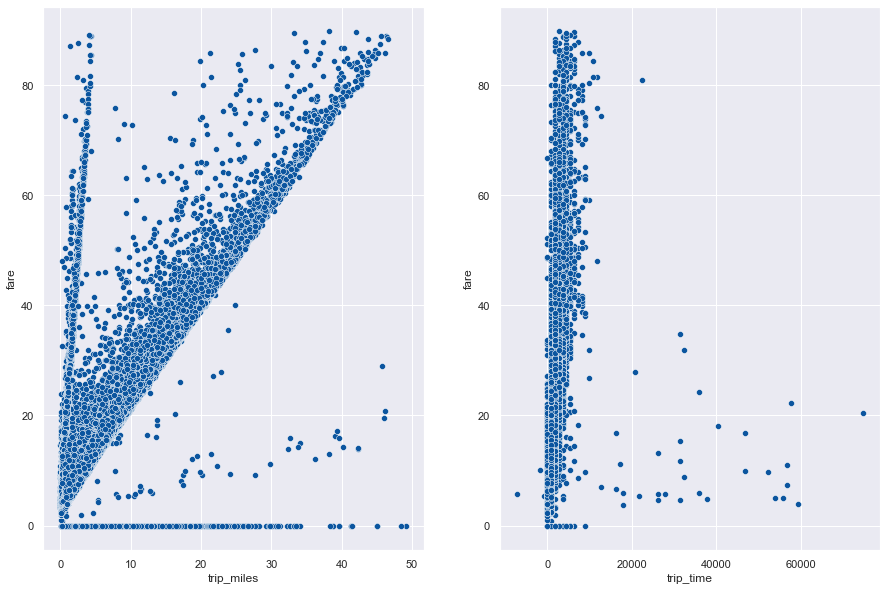

In [24]:
scatter_data = taxi_data

plt.figure(figsize = (15, 10))
plt.subplot(1, 2, 1)
sns.scatterplot(data=taxi_data, x="trip_miles", y="fare")
plt.subplot(1, 2, 2)
sns.scatterplot(data=taxi_data, x="trip_time", y="fare")

#### **Związek napiwków z formą płatności**
- z analizowanych danych wynika, że jeśli klient był skłonny dać napiwek za przejazd to w 99,68% przypadków płacił kartą.
- powyższa informacja mogłaby być sugestią, dla przedsiębiorstw oferujących przejazdy, by oferować płatność kartą, ponieważ zwiększa to <br>
szanse na zwiększenie średniej wartości przejazdu a co za tym idzie przychodów.


In [25]:
all_tips = len(taxi_data[taxi_data.tips != 0])
tips_card = len(taxi_data[(taxi_data.tips != 0) & (taxi_data.payment_type == "Credit Card")])
tips_cash = len(taxi_data[(taxi_data.tips != 0) & (taxi_data.payment_type == "Cash")])

print("Procent wszystkich napiwków dokonanych przy użyciu karty kredytowej:", round(tips_card*100/all_tips, 2), "%")
print("Procent wszystkich napiwków dokonanych przy użyciu gotówki:", round(tips_cash*100/all_tips, 2), "%")

Procent wszystkich napiwków dokonanych przy użyciu karty kredytowej: 99.68 %
Procent wszystkich napiwków dokonanych przy użyciu gotówki: 0.31 %
